In [1]:
!pip install gsvi
!pip install pytrends
!pip install cssselect

  Created wheel for gsvi: filename=gsvi-0.2.2-py3-none-any.whl size=12871 sha256=601bee1035de9a5f5db9251cfaac0ad2f49ff6ef158f08ad3482cc457f07f913
  Stored in directory: /root/.cache/pip/wheels/4f/bf/2d/6681d0a61e3f6f69dd3974ff1158fa594d7708b0865f6ee518
Successfully built gsvi
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=7fc8759e7cb394e4d7f6210c7289cfb3b51fbcab8c5cdcd17653d27f8bebbbbe
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [2]:
import datetime as dt

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

from urllib.parse import urlparse, parse_qs
from lxml.html import fromstring
from requests import get
import csv

# Trending Keywords

In [3]:
from pytrends.request import TrendReq
pytrend = TrendReq()

In [4]:
kw_list=['thảo điền', 'riverside']
pytrend.build_payload(kw_list=kw_list,geo='VN',timeframe='today 5-y')

In [ ]:
# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df.tail(10)

,thảo điền,riverside,isPartial
date,,,
2022-02-06,37,62,False
2022-02-13,38,57,False
2022-02-20,38,53,False
2022-02-27,37,50,False
2022-03-06,36,47,False
2022-03-13,35,48,False
2022-03-20,37,50,False
2022-03-27,36,50,False
2022-04-03,38,58,False


Text(0, 0.5, 'Trends Index')

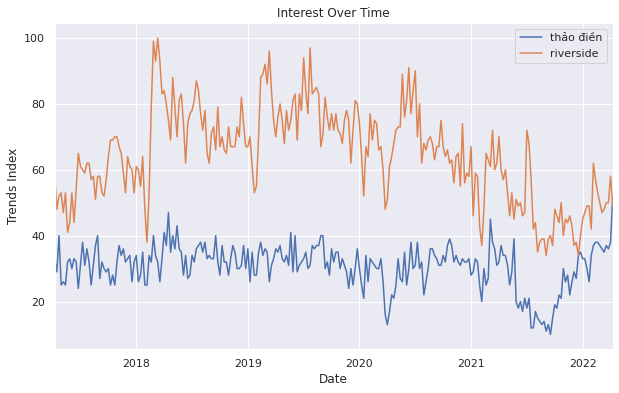

In [ ]:
import seaborn as sns
sns.set()
dx = interest_over_time_df.plot.line(figsize= (10,6), title=("Interest Over Time"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')


In [ ]:
region_interest = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
region_interest

,thảo điền,riverside
geoName,,
An Giang Province,0,100
Ba Ria - Vung Tau,30,70
Bac Giang,0,100
Bac Lieu,0,100
Bac Ninh Province,0,100
...,...,...
Vinh Long,0,100
Vinh Phuc Province,0,100
Yen Bai Province,0,100


Text(0, 0.5, 'Interest')

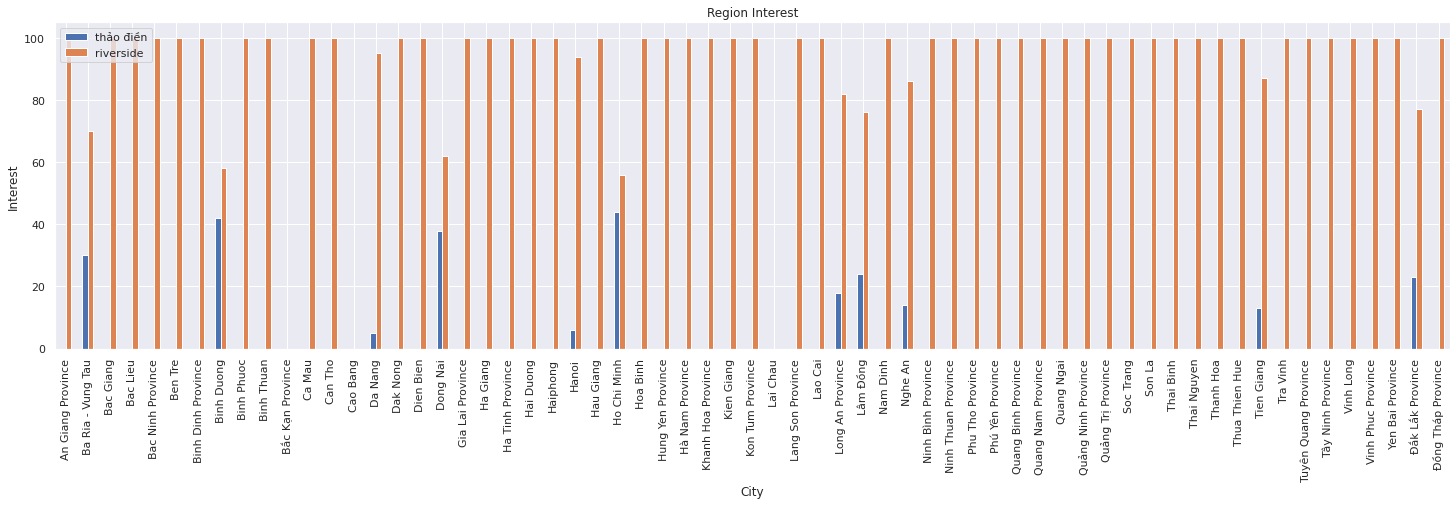

In [ ]:
sns.set()
dx = region_interest.plot.bar(figsize= (25,6), title=("Region Interest"))
dx.set_xlabel('City')
dx.set_ylabel('Interest')

In [ ]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
related_queries_dict['riverside']['rising']

,query,value
0,peach boy riverside tập 1,215950
1,anime peach boy riverside,56550
2,riverside bamboo villa pho co hoi an,48300
3,peach boy riverside chap,40250
4,indochina riverside complex,40200
5,riverside bamboo villa phố cổ hội an,37950
6,riverside bamboo villa trung tâm hội an,32150
7,peach boy riverside tập 2,27650
8,peach boy riverside tập 3,17200
9,dự án indochina riverside complex,16000


# Get keyword position by page name

In [ ]:
keyword_rank = pd.DataFrame()

In [ ]:
from googlesearch import search

In [ ]:
KEYWORDS = 'bất động sản thảo điền'
link = []
hostname = []
for data in search(KEYWORDS, tld='com.vn', lang='vi', num=10, stop=30): # top 10 results from the first 3 pages
  link.append(data)
  hostname.append(urlparse(data).netloc)
keyword_rank['hostname'] = hostname
keyword_rank['link'] = link

In [ ]:
def get_rank(hostname=None):
  if hostname==None:
    return keyword_rank
  else:
    return keyword_rank[keyword_rank['hostname'].str.contains(hostname)]

In [ ]:
get_rank("batdongsan")

,hostname,link
0,batdongsan.com.vn,https://batdongsan.com.vn/ban-dat-phuong-thao-...
1,batdongsan.com.vn,https://batdongsan.com.vn/nha-dat-ban-phuong-t...
3,batdongsanexpress.vn,https://batdongsanexpress.vn/chu-dau-tu/cong-t...


In [ ]:
get_rank()

,hostname,link
0,batdongsan.com.vn,https://batdongsan.com.vn/ban-dat-phuong-thao-...
1,batdongsan.com.vn,https://batdongsan.com.vn/nha-dat-ban-phuong-t...
2,nha.chotot.com,https://nha.chotot.com/mua-ban-bat-dong-san-ph...
3,batdongsanexpress.vn,https://batdongsanexpress.vn/chu-dau-tu/cong-t...
4,m.thanhnien.vn,https://m.thanhnien.vn/bat-dong-san-thao-dien-...
5,danhkhoireal.vn,https://danhkhoireal.vn/cong-ty-co-phan-dau-tu...
6,alonhadat.com.vn,https://alonhadat.com.vn/nha-dat/can-ban/nha-d...
7,rever.vn,https://rever.vn/chu-dau-tu/thao-dien-investment
8,finance.vietstock.vn,https://finance.vietstock.vn/HAR-ctcp-dau-tu-t...
9,nhadat.tuoitre.vn,https://nhadat.tuoitre.vn/bat-dong-san-thao-di...
